In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Second convolutional block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Third convolutional block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/30
625/625 - 21s - 33ms/step - accuracy: 0.4128 - loss: 2.3222 - val_accuracy: 0.3628 - val_loss: 2.3914
Epoch 2/30
625/625 - 6s - 9ms/step - accuracy: 0.5679 - loss: 1.5762 - val_accuracy: 0.6526 - val_loss: 1.2733
Epoch 3/30
625/625 - 10s - 16ms/step - accuracy: 0.6491 - loss: 1.2754 - val_accuracy: 0.6788 - val_loss: 1.1957
Epoch 4/30
625/625 - 10s - 16ms/step - accuracy: 0.6944 - loss: 1.1379 - val_accuracy: 0.7290 - val_loss: 1.0589
Epoch 5/30
625/625 - 10s - 16ms/step - accuracy: 0.7306 - loss: 1.0562 - val_accuracy: 0.7188 - val_loss: 1.0677
Epoch 6/30
625/625 - 10s - 17ms/step - accuracy: 0.7487 - loss: 1.0159 - val_accuracy: 0.7498 - val_loss: 1.0277
Epoch 7/30
625/625 - 10s - 16ms/step - accuracy: 0.7720 - loss: 0.9614 - val_accuracy: 0.7450 - val_loss: 1.0965
Epoch 8/30
625/625 - 10s - 16ms/step - accuracy: 0.7877 - loss: 0.9345 - val_accuracy: 0.7760 - val_loss: 1.0044
Epoch 9/30
625/625 - 10s - 17ms/step - accuracy: 0.8038 - loss: 0.8850 - val_accuracy: 0.7884 - va

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8439 - loss: 0.8703
Test Accuracy: 0.8387, Test Loss: 0.8839


In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.95      0.90      0.92      1000
           2       0.78      0.76      0.77      1000
           3       0.76      0.65      0.70      1000
           4       0.83      0.82      0.82      1000
           5       0.80      0.76      0.78      1000
           6       0.79      0.93      0.86      1000
           7       0.90      0.88      0.89      1000
           8       0.84      0.94      0.89      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



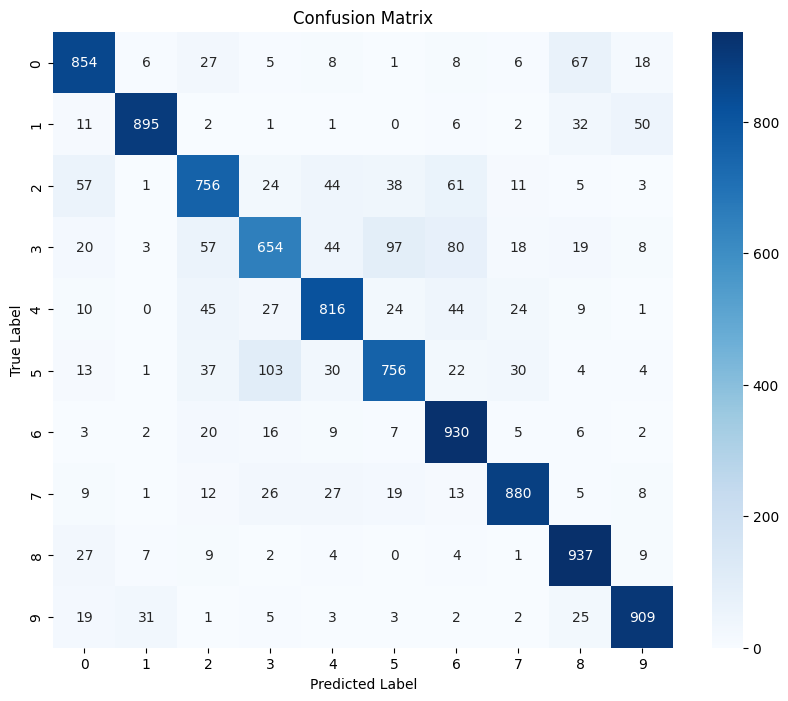

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.7502


In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0261 - val_loss: 0.0083
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0079 - val_loss: 0.0068
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/st

In [14]:
reconstructed_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [15]:
ssim_scores = []
psnr_scores = []

print("Computing SSIM and PSNR for reconstructed images...")
for i in range(100):  # Sample first 100 images
    original = x_test[i]
    reconstructed = reconstructed_images[i]
    ssim_scores.append(ssim(original, reconstructed, data_range=1.0, channel_axis=2))
    psnr_scores.append(psnr(original, reconstructed, data_range=1.0))

print("Average SSIM (Reconstruction):", np.mean(ssim_scores))
print("Average PSNR (Reconstruction):", np.mean(psnr_scores))

Computing SSIM and PSNR for reconstructed images...
Average SSIM (Reconstruction): 0.8238220164867702
Average PSNR (Reconstruction): 24.407504134214854


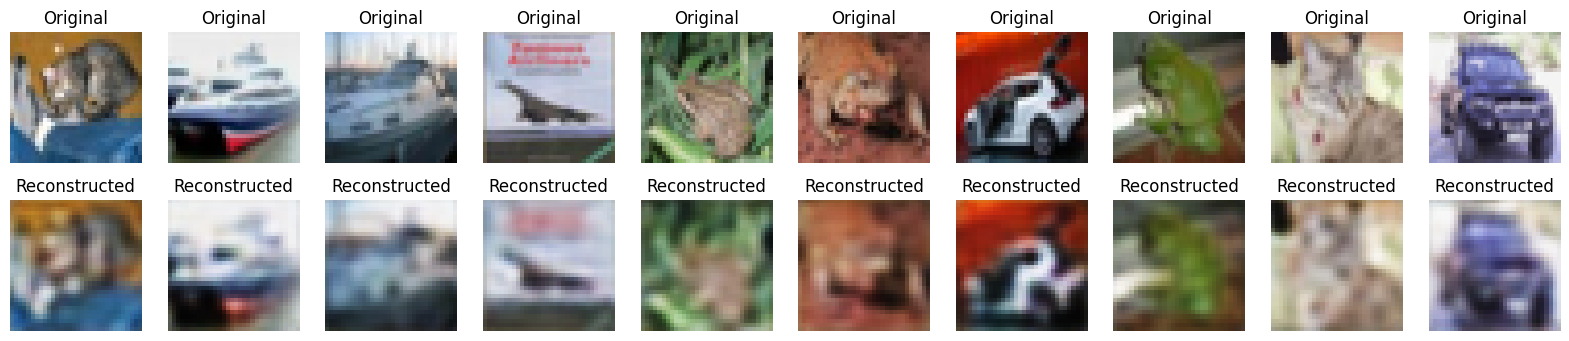

In [16]:
import matplotlib.pyplot as plt

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()